In [1]:
%%time
%run -i 'myimports.py'
# %run -i "youtube_extraction.py"
# %run -i "nlp_processing.py"
%run -i "timestamp_generation"

nlp = spacy.load('en_core_web_sm')



#get collection of documents (minute of podcast) in a list
file = "3Lex/#101|Joscha_Bach|Artificial_Consciousness_and_the_Nature_of_Reality.txt"
document_size = 500
topic_size = 1000

dictionary, model = generate_model(file, document_size, topic_size)
doc = nlp(open(file).read())
sents = list(doc.sents)

top_confi = load_confidences(file, topic_size, dictionary, model, sents)


#need to optimize number of topics in a document, how many previous sentences and after sentences will current sentence be compared to, alpha and beta values for LDA

#will process each podcast sentence by sentence. Will determine if each sentence leads to a new topic. 
#If longish question, high probability of new topic. 
#Each sentence topic probability will be compared to previous x number of sentence topics before and after


CPU times: user 12 s, sys: 3.47 s, total: 15.5 s
Wall time: 21 s


In [51]:
breaks = ["So can we try to reverse engineer your mind a little bit?",
         "So what is your sense in the philosophical?",
         "Do you think of computation and computer science and you kind of represent that to me?",
         "Can you talk about what is dualism or does idealism or is materialism?",
          "But why does the simulation feel like something?",
          "But what is the connection between the the brain, the mind and the broader universe which comes first, which is more fundamental?",
          "So have you ever seen artificial intelligence or any kind of construction idea that allows for unlike neural networks or perhaps within neural networks, that is able to form something where the space of concepts continues to be integrated?",
          "What kind of mechanisms might we move towards to improve the learning procedure?",
          "or so that you discovered this?",
          "The spirit of the civilization is the entirety of this civilization may not exist for long.",
          "The dopamine rush of the like, no matter how like I consider I tried to be very kind of Zen like and minimalist and not be influenced by likes and so on.",
          "What kind of mechanisms of government do you think we as a species should be evolving with us?",
          "So what is the trajectory out of self-destruction, do you think?",
          "What is the most beautiful to you, silly ape, the most beautiful, surprising idea in the development of artificial intelligence, whether in your own life or in the history of artificial intelligence that you have come across.",
          "All the competitors in the game are improving gradually.",
          "I think I think it is a compelling notion, but it discards quietly or at least makes implicit the fact that you need to have something like common sense reasoning to walk."
          "Do you think that ajai systems that we try to create or greater intelligence systems would need to have a body?",
          "How does that change the fundamentals of the zeroth order in the first order?",
          "If you can directly access all of Wikipedia in trying to understand what is the best form of government, then every thought will not be stuck in a like every thought that requires some extra piece of information will be able to grab it really quickly.",
          "But in the context of the mind, what is the role of emotion and what is it?",
          "So do you think suffering is fundamental to happiness along these lines, suffering as the result of caring about things that you cannot change?Z"        
         ]


          
    
break_inds = []
for ind, sent in enumerate(sents):
    if next((True for single in breaks if sent.text in single), False):
#         print(ind)
        break_inds.append(ind)
break_inds = np.array([break_inds])
timestamp_array = np.zeros([2193, 1])

In [48]:
for i in break_inds:
    timestamp_array[i]=1

In [50]:
print(sents[114])

So what is your sense in the philosophical?


In [52]:
# print_sent_confi(sents, model, 100, 200)

In [8]:
for topics in range(int(pod_word_count(file)/topic_size)):
    print(topics, np.count_nonzero(top_confi[topics]))

0 43
1 51
2 42
3 42
4 69
5 94
6 65
7 68
8 0
9 33
10 47
11 0
12 51
13 123
14 54
15 73
16 49
17 57
18 87
19 72
20 103
21 64
22 57
23 138
24 67
25 82
26 61
27 132
28 44
29 47
30 95
31 40


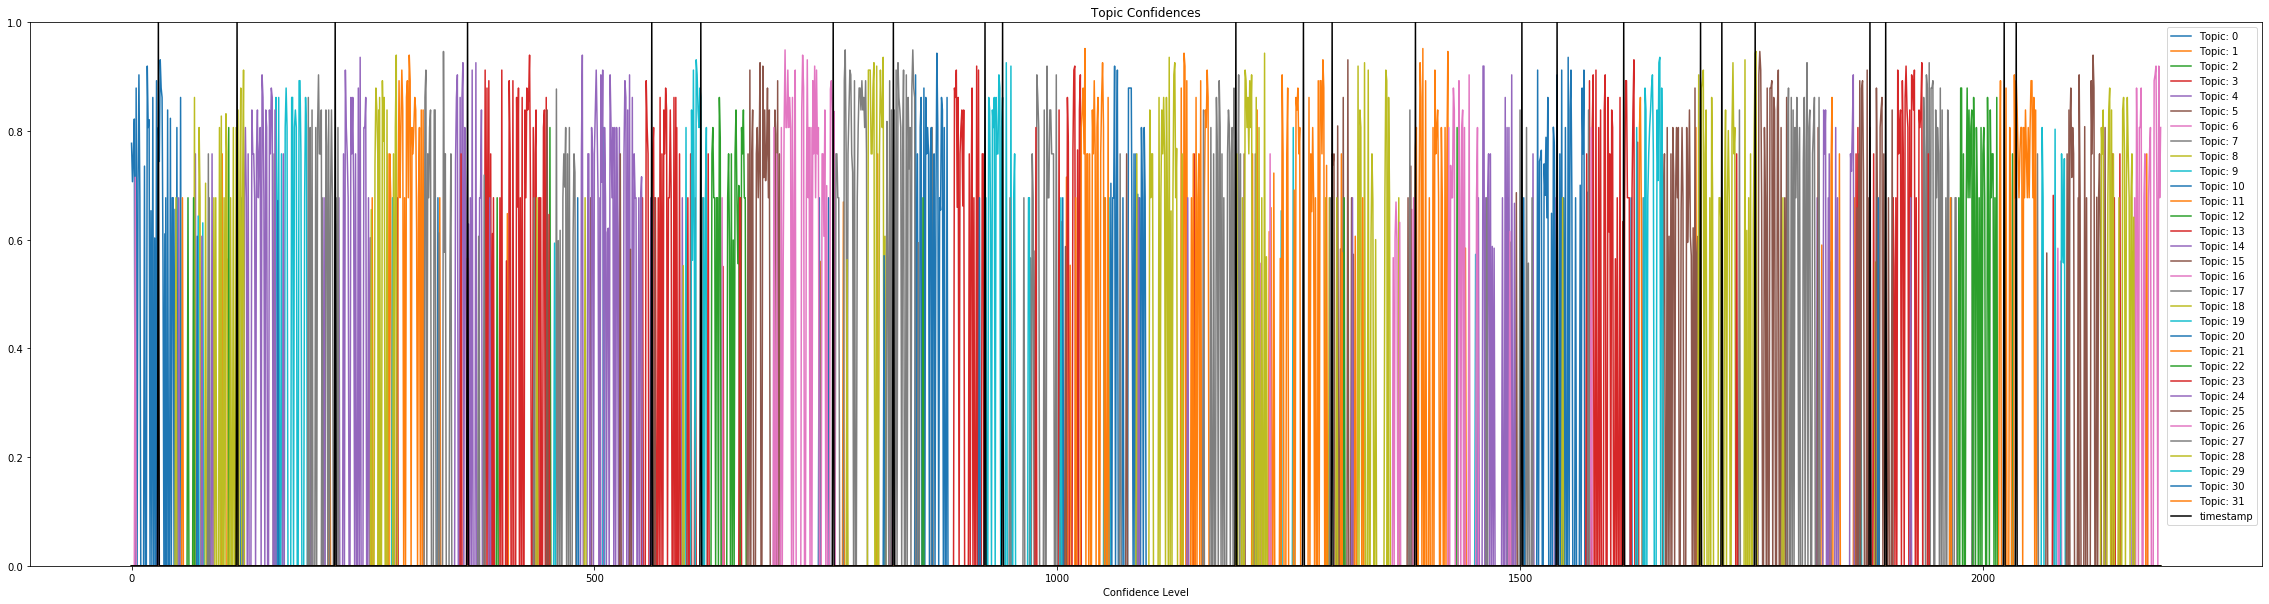

In [49]:
x = np.arange(0, len(sents))
plt.title("Topic Confidences")
plt.xlabel("Sentence Number")
plt.xlabel("Confidence Level")
plt.ylim(0,1)
for i in range(int(pod_word_count(file)/topic_size)):
    plt.plot(x,top_confi[i], label="Topic: "+str(i))
plt.plot(x, timestamp_array, label="timestamp", color="black")
plt.legend()
plt.rcParams['figure.figsize'] = [40, 10]
plt.show()